In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum  # 폰트설치
!sudo fc-cache -fv  # 폰트캐시 재구성
!rm ~/.cache/matplotlib -rf  # matplotlib 캐시 제거

# 설치가 끝나면 코렙의 런타임을 다시 시작함

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 111 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existen

In [ ]:
# matplotlib의 폰트를 Nanum 폰트로 지정
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False  

# 다중회귀분석
* 단일 회귀분석에 비해 변수가 2개이상 증가
* 기술통계학이나 추론통계학 상의 주요 기법

* 종속변수y를 보다 더 잘 설명하고 예측하기 위해
여러 독립변수x를 사용함

* 다중회귀방정식
$ \hat{y} = a + bx_1 + cx_2 + dx_3 + ... $

* 하지만, 독립변수가 3개 이상인 경우
그래프로 표현하기 어려워지므로   
보통 $ \hat{y} = a + bx_1 + cx_2 $ 정도로만 고려하는 것이 좋음

# 다중회귀모형 분석방법
* 수정된 결정계수
 + 독립변수의 수가 증가할수록 예측력이 좋아져서
 + 결정계수의 수치가 증가하는 경향이 있음
 + 이러한 효과를 상쇄시킨 수정된 결정계수를 사용

* 모든 회귀계수들의 유의성을 판단 : F분포
 + 다중회귀계수가 모두 0인지 검정함
 + 귀무가설 : 각 계수 a,b,c 가 0이다
 + 대립가설 : 각 계수 a,b,c 가 0이 아니다
 + 유의수준 0.05로 정함, 양측검정

* 개별회귀계수에 대한 평가 : t분포
 + 귀무가설 : 계수 x 가 0이다
 + 대립가설 : 계수 x 가 0이 아니다
 + 유의수준 0.05로 정함, 양측검정

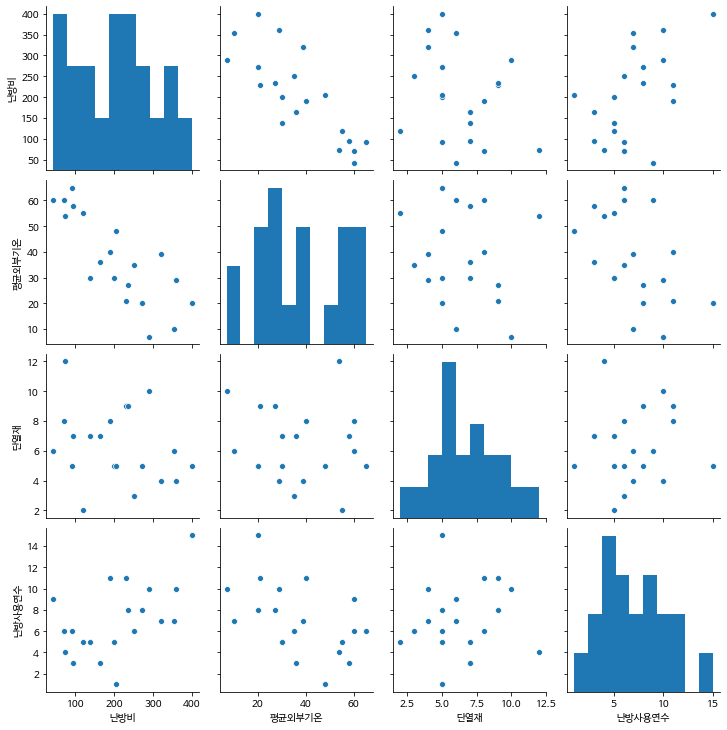

In [ ]:
# ex) 부동산회사에서 소유하고 있는 주택에 대해
# 고객들의 많은 문의사항 중 하나는 난방비가
# 얼마나 드냐임. 난방비 가이드라인 작성을 위해
# 임의로 선별한 20채의 주택에 대해
# 다중회귀분석을 실시하시오 (houses.txt)

houses = pd.read_csv('https://raw.githubusercontent.com/siestageek/bigdataset/master/houses.txt', sep='\t',
                     encoding='euc-kr')

sns.pairplot(houses)

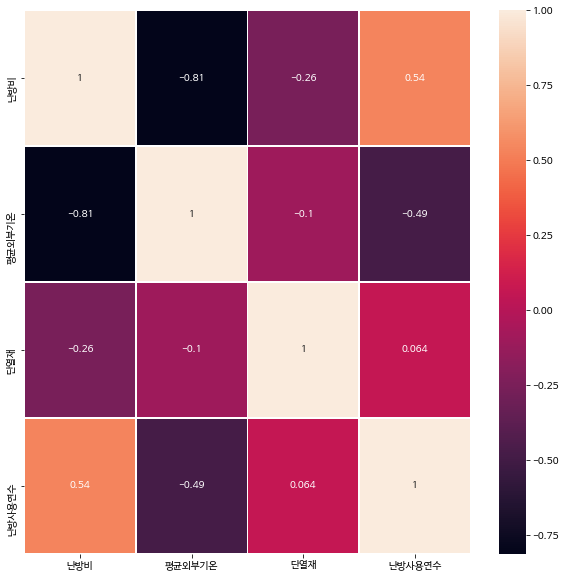

In [ ]:
df_corr = houses.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
# 다중회귀분석
# 종속변수~독립변수1+독립변수2+독립변수3+...
# 종속변수~.  (. : 종속변수를 제외한 나머지 모든 독립변수)
result = ols('난방비~평균외부기온+단열재+난방사용연수', data=houses).fit()
print(result.summary())

# 다중회귀모델 분석
# 1.수정된 결정계수 : 0.767
# 2.F통계량 : 21.90 (6.56e-06) 
# 3.회귀계수 : 절편-427.1938, 기울기1-(-4.5827), 기울기2-(-14.8309), 기울기3-(6.1010)
# 4.회귀계수 유의수준 : (>0.00001/>0.00001/0.007/0.148)
# 5.회귀식 : y = -4.58*x1 + -14.83*x2 + 6.10*x3 + 427.19

# 다중회귀모델 해석
# 1) 외부기온 1도 증가 => 난방비는 4.58 감소
# 2) 단열재 두께가 1cm 증가 => 난방비는 14.83 감소
# 3) 난방기연수가 1년증가 => 난방비는 6.10 증가
# 4) 주택 자체 기본 난방비 => 난방비는 427.19

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     21.90
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           6.56e-06
Time:                        01:17:46   Log-Likelihood:                -104.80
No. Observations:                  20   AIC:                             217.6
Df Residuals:                      16   BIC:                             221.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    427.1938     59.601      7.168      0.0

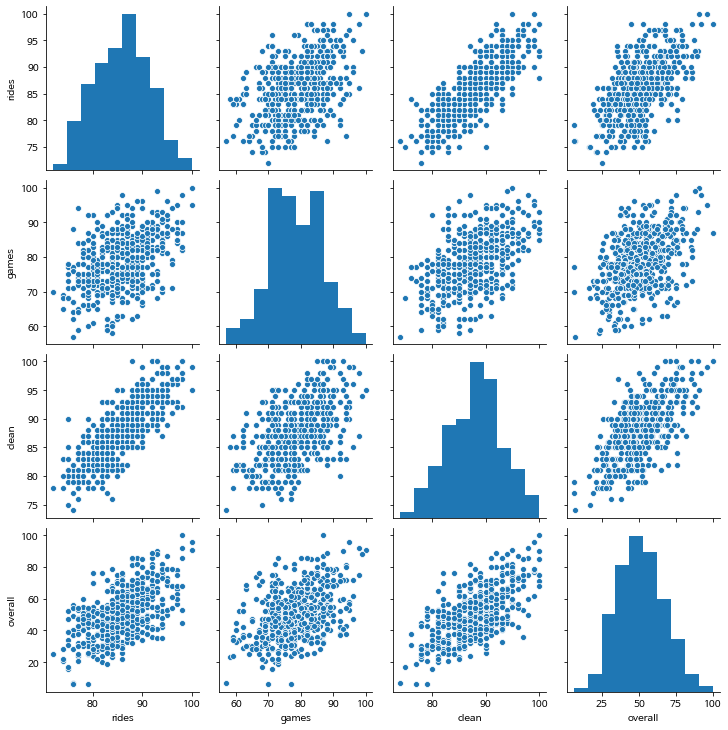

In [ ]:
# ex) 놀이동산 만족도 데이터를 이용해서
# 놀이기구rides,게임만족도games,청결만족도clean와 
# 전체만족도overall에 대한 관계를 분석해보고
# 회귀방정식을 작성하시오 (parks.csv)

parks = pd.read_csv('https://raw.githubusercontent.com/siestageek/bigdataset/master/parks.csv')

sns.pairplot(parks.loc[:, ['rides','games','clean','overall']])

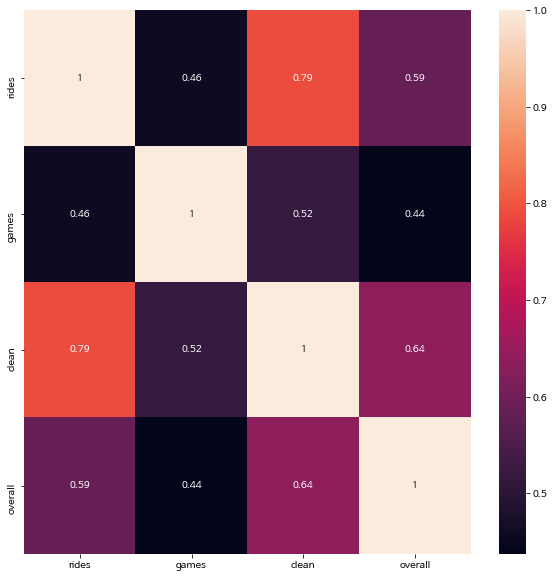

In [ ]:
# 상관분석을 히트맵으로 표시
df_corr = parks.loc[:, ['rides','games','clean','overall']].corr()

fig, axs = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, annot=True, ax=axs)

In [ ]:
# 다중회귀분석
result = ols('overall~rides+games+clean', data=parks).fit()
print(result.summary())

# 다중회귀모델 분석
# 1.수정된 결정계수 :  0.436
# 2.F통계량 : 129.5 (5.99e-62) 
# 3.회귀계수 : 절편-(-131.68), 기울기1-(0.5780), 기울기2-(0.2603), 기울기3-(1.2838)
# 4.회귀계수 유의수준 : (>0.00001/>0.00001/>0.00001/>0.00001)
# 5.회귀식 : y = 0.58*x1 + 0.26*x2 + 1.28*x3 - 131.68

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.99e-62
Time:                        02:20:51   Log-Likelihood:                -1946.9
No. Observations:                 500   AIC:                             3902.
Df Residuals:                     496   BIC:                             3919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -131.6788      9.384    -14.032      0.0

# 회귀모형의 적합성 검정
* 주택회사가 보유한 주택에 대한 난방비 가이드라인 작성을 위해
다중회귀분석을 실시했었음
* 한편, 이러한 회귀모형이 과연 적합한 것일까?

* 회귀모형 작성시 적절한 필요조건을 만족하는지 알아봄
 + 선형성/정규성/분산성/독립성

![](https://github.com/siestageek/bigdataset/blob/master/diag_plots.png?raw=true)


* 1) 선형성 : 잔차 예측비교도
  + 잔차를 표준화시켜 정규분포를 따르는지 확인
  +  점선은 직선에 가깝게, 분포의 모양이 위 아래 균등하게 배치

* 2) 정규성 : 독립변수가 정규성을 띄면 잔차도 정규분포를 띄는가?
  +  45도 점선에 점들이 가깝게 배치
  + 단, 양 끝점들은 점선에서 벗어나도 무난 

* 3) 분산성 : 잔차 분산비교도
  + 독립변수의 분산이 일정하면? 잔차도 비숫한 양상을 띄는가?
  + 점선은 직선에 가깝게, 분포의 모양이 위 아래 균등하게 배치

* 4) 독립성 : 잔차의 영향력 파악
  + cook's distance
  + 회귀방정식의 계수결정에 불균형한 영향을 미치는 독립변수 존재 파악
  + 회귀분석에서 잔차의 크기가 큰 데이터는 보통 이상치로 취급
  + cook's distance를 통해 잔차와 리버레지를 동시에 볼수 있음
  + 빨간선은 직선에 가깝게, 점들 분포는 되도록 빨간선에 가깝게,
  + 단, 빨간점선 밖은 벗어나지 않게



In [ ]:
# 선형성 확인
# 예측값(fitted)과 잔차(residual)의 비교

# 다중공선성
* 독립변수는 종속변수하고만 상관관계가 존재해야 함
* 공선성 : 하나의 독립변수가 다른 하나의 독립변수에 의해 
         잘 예측되는 정도 또는 서로 상관이 높은 경우를 의미
* 다중공선성 : 하나의 독립변수가 다른 여러개의 독립변수에 의해 
            잘 예측되는 정도를 의미
* 다중공선성이 있으면 계수 추정이 잘 안되거나 불안정해져서 
  데이터가 약간만 바뀌어도 추정치가 크게 달라질수 있음 

$$ VIF_i = {1 \over {1-R^2_i}} $$

* 두 독립변수간의 상관계수가 -0.7~0.7사이면 사용해도 됨
* 분산팽창계수(VIF)를 구하여 판단하기도 함
* 엄밀한 기준은 없으나 보통 10을 넘어서면 다중공선성이 있다고 판단

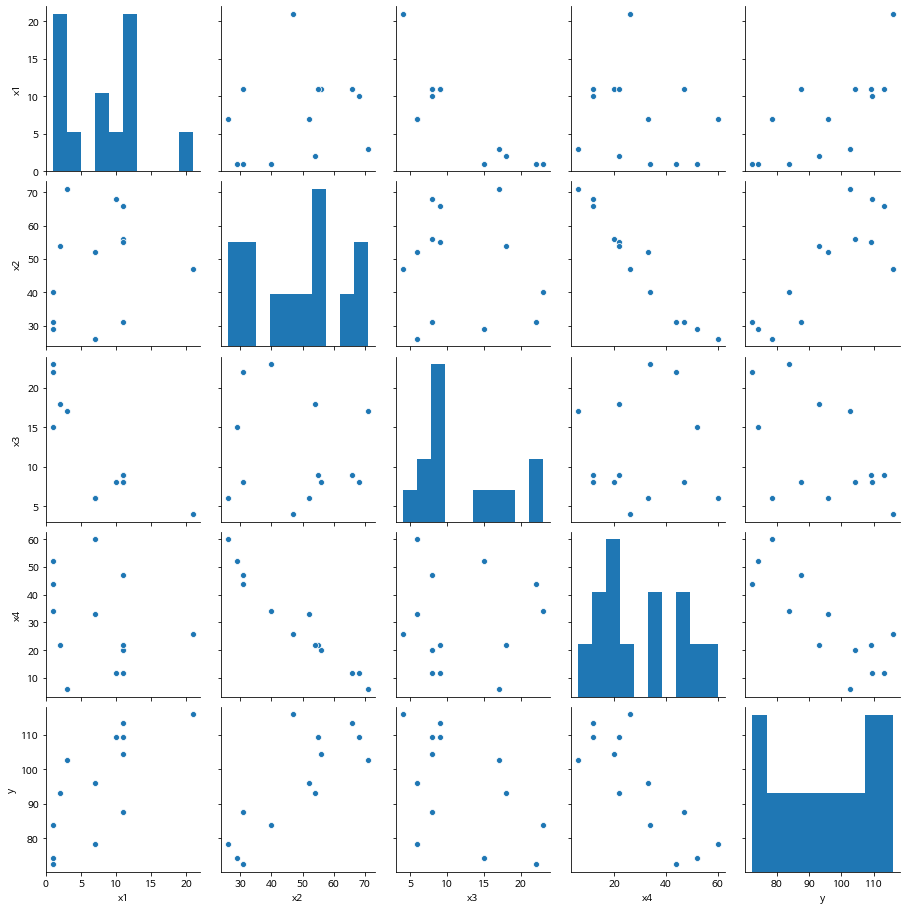

In [ ]:
# ex) 다중공선성 문제 풀기
# 시멘트가 굳어지며 발생하는 열의 양을 
# 결정짓는 4가지 성분의 회귀분석

x1 = [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]
x2 = [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]
x3 = [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]
x4 = [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]

y = [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]

cement = pd.DataFrame({'x1':x1,'x2':x2, 'x3':x3,'x4':x4,'y':y})

sns.pairplot(cement)

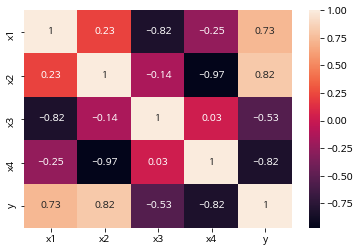

In [ ]:
# 상관계수 시작화
df_corr = cement.corr()
sns.heatmap(df_corr, annot=True)

In [ ]:
# 다중회귀분석
result = ols('y~x1+x2+x3+x4', data=cement).fit()
print(result.summary())

# 분석결과
# 결정계수는 높지만 (심지어 조정된 결정계수조차도!)
# 각 계수별 유의성은 거의 없음! (유의확률 0.05보 큼) 
# => 다중공선성 때문에 발생 => 따라서, 팽창계수VIF를 확인해 봄

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.76e-07
Time:                        03:35:19   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4054     70.071      0.891      0.3

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

model = ols('y~x1+x2+x3+x4', data=cement)
print(model.exog_names) # 독립변수 이름 확인

print(variance_inflation_factor(model.exog, 1))
# 1번째 독립변수의 VIF 확인

print(variance_inflation_factor(model.exog, 2))
# 2번째 독립변수의 VIF 확인

print(variance_inflation_factor(model.exog, 3))
# 3번째 독립변수의 VIF 확인

print(variance_inflation_factor(model.exog, 4))
# 4번째 독립변수의 VIF 확인

['Intercept', 'x1', 'x2', 'x3', 'x4']
38.4962114906356
254.42316585092587
46.868386333574165
282.51286478856906


In [ ]:
# 1. x1,x3을 이용한 다중회귀분석
model = ols('y~x1+x3', data=cement)
print(model.fit().summary())
print(model.exog_names) # 독립변수 이름 확인
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6.066
Date:                Mon, 27 Jul 2020   Prob (F-statistic):             0.0188
Time:                        04:10:40   Log-Likelihood:                -48.005
No. Observations:                  13   AIC:                             102.0
Df Residuals:                      10   BIC:                             103.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.3490     17.053      4.243      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [ ]:
# 2. x1,x2을 이용한 다중회귀분석
model = ols('y~x1+x2', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

# 수정된 결정계수 : 0.979

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     229.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.41e-09
Time:                        04:11:52   Log-Likelihood:                -28.156
No. Observations:                  13   AIC:                             62.31
Df Residuals:                      10   BIC:                             64.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [ ]:
# 3. x3,x4을 이용한 다중회귀분석
model = ols('y~x3+x4', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

# 수정된 결정계수 : 0.974
# 회귀계수들은 유의성 검정 성공!

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     72.27
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.13e-06
Time:                        04:12:24   Log-Likelihood:                -35.372
No. Observations:                  13   AIC:                             76.74
Df Residuals:                      10   BIC:                             78.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.2824      3.275     40.089      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [ ]:
# 4. x2,x3,x4을 이용한 다중회귀분석
model = ols('y~x2+x3+x4', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))
print(variance_inflation_factor(model.exog, 3))

# 수정된 결정계수 :  0.964
# 회귀계수들은 유의성 검정 성공!

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.30e-07
Time:                        04:12:52   Log-Likelihood:                -29.734
No. Observations:                  13   AIC:                             67.47
Df Residuals:                       9   BIC:                             69.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.6420     20.648      9.863      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


# 독립변수 최적화
* 독립변수가 많을때 유의한 계수를 포함시키고
유의하지 않은 계수를 제외시켜 구한 회귀방정식은 간단해지고 이해하기 쉬워짐
 + 가능하다면 적은수의 독립변수를 포함하는 것이 좋음

* 다중회귀식에 포함할 수 있는 독립변수들을
효과적으로 선별할 수 있는 분석방법
 + 단계적 회귀법, 단계적 변수선택법 

### 독립변수 소거법
* 전진소거법 : 변수를 하나씩 추가함 => 중요도가 높은 변수부터 추가
* 후진소거법 : 모든 변수를 추가해둔 상태에서              p값이 높은 변수부터 제거
* 단계적 선택법 : 전진/후진 소거법을 적절히 조합

# 변수소거시 참고해야하는 지표 : AIC, BIC
# 모델에 k개의 변수를 추가하면 2k만큼 불이익이 추가함
# 따라서, 변수 소거시 AIC, BIC가 낮아지는 모델을 찾으면 됨

$$ AIC = 2P + nlog({RSS \over n}) $$
$$ BIC = plog(n) + nlog({RSS \over n}) $$

In [ ]:
# ex) 부동산회사에서 소유하고 있는 주택에 대해
# 예상 난방비를 예측하려함. 모든 독립 변수들을 후진 소거법을 이용해서 
# 적절한 회귀방정식을 작성하세요

houses = pd.read_csv('https://raw.githubusercontent.com/siestageek/bigdataset/master/houses.txt', 
                     sep='\t', encoding='euc-kr')

model = ols('난방비~평균외부기온+단열재+난방사용연수', data=houses)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     21.90
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           6.56e-06
Time:                        05:47:57   Log-Likelihood:                -104.80
No. Observations:                  20   AIC:                             217.6
Df Residuals:                      16   BIC:                             221.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    427.1938     59.601      7.168      0.0

In [ ]:
# 난방사용연수 제외하고 다시 다항회귀분석
model = ols('난방비~평균외부기온+단열재', data=houses)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     29.42
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           3.01e-06
Time:                        05:50:30   Log-Likelihood:                -106.15
No. Observations:                  20   AIC:                             218.3
Df Residuals:                      17   BIC:                             221.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    490.2859     44.410     11.040      0.0

In [ ]:
# Boston 집값 데이터를 이용해서
# 다중회귀분석을 실시하고
# 적절한 변수들로 구성된 회귀식을 작성하세요
# 1979 보스턴 지역 주택가격
# 560개 타운의 주택가격의 중앙값(단위 1000 달러)

from sklearn.datasets import  load_boston

boston = load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
model = ols('MEDV~1', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 27 Jul 2020   Prob (F-statistic):                nan
Time:                        06:44:30   Log-Likelihood:                -1840.2
No. Observations:                 506   AIC:                             3682.
Df Residuals:                     505   BIC:                             3687.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.409     55.111      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


In [ ]:
model = ols('MEDV~CRIM', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.17e-19
Time:                        06:45:00   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

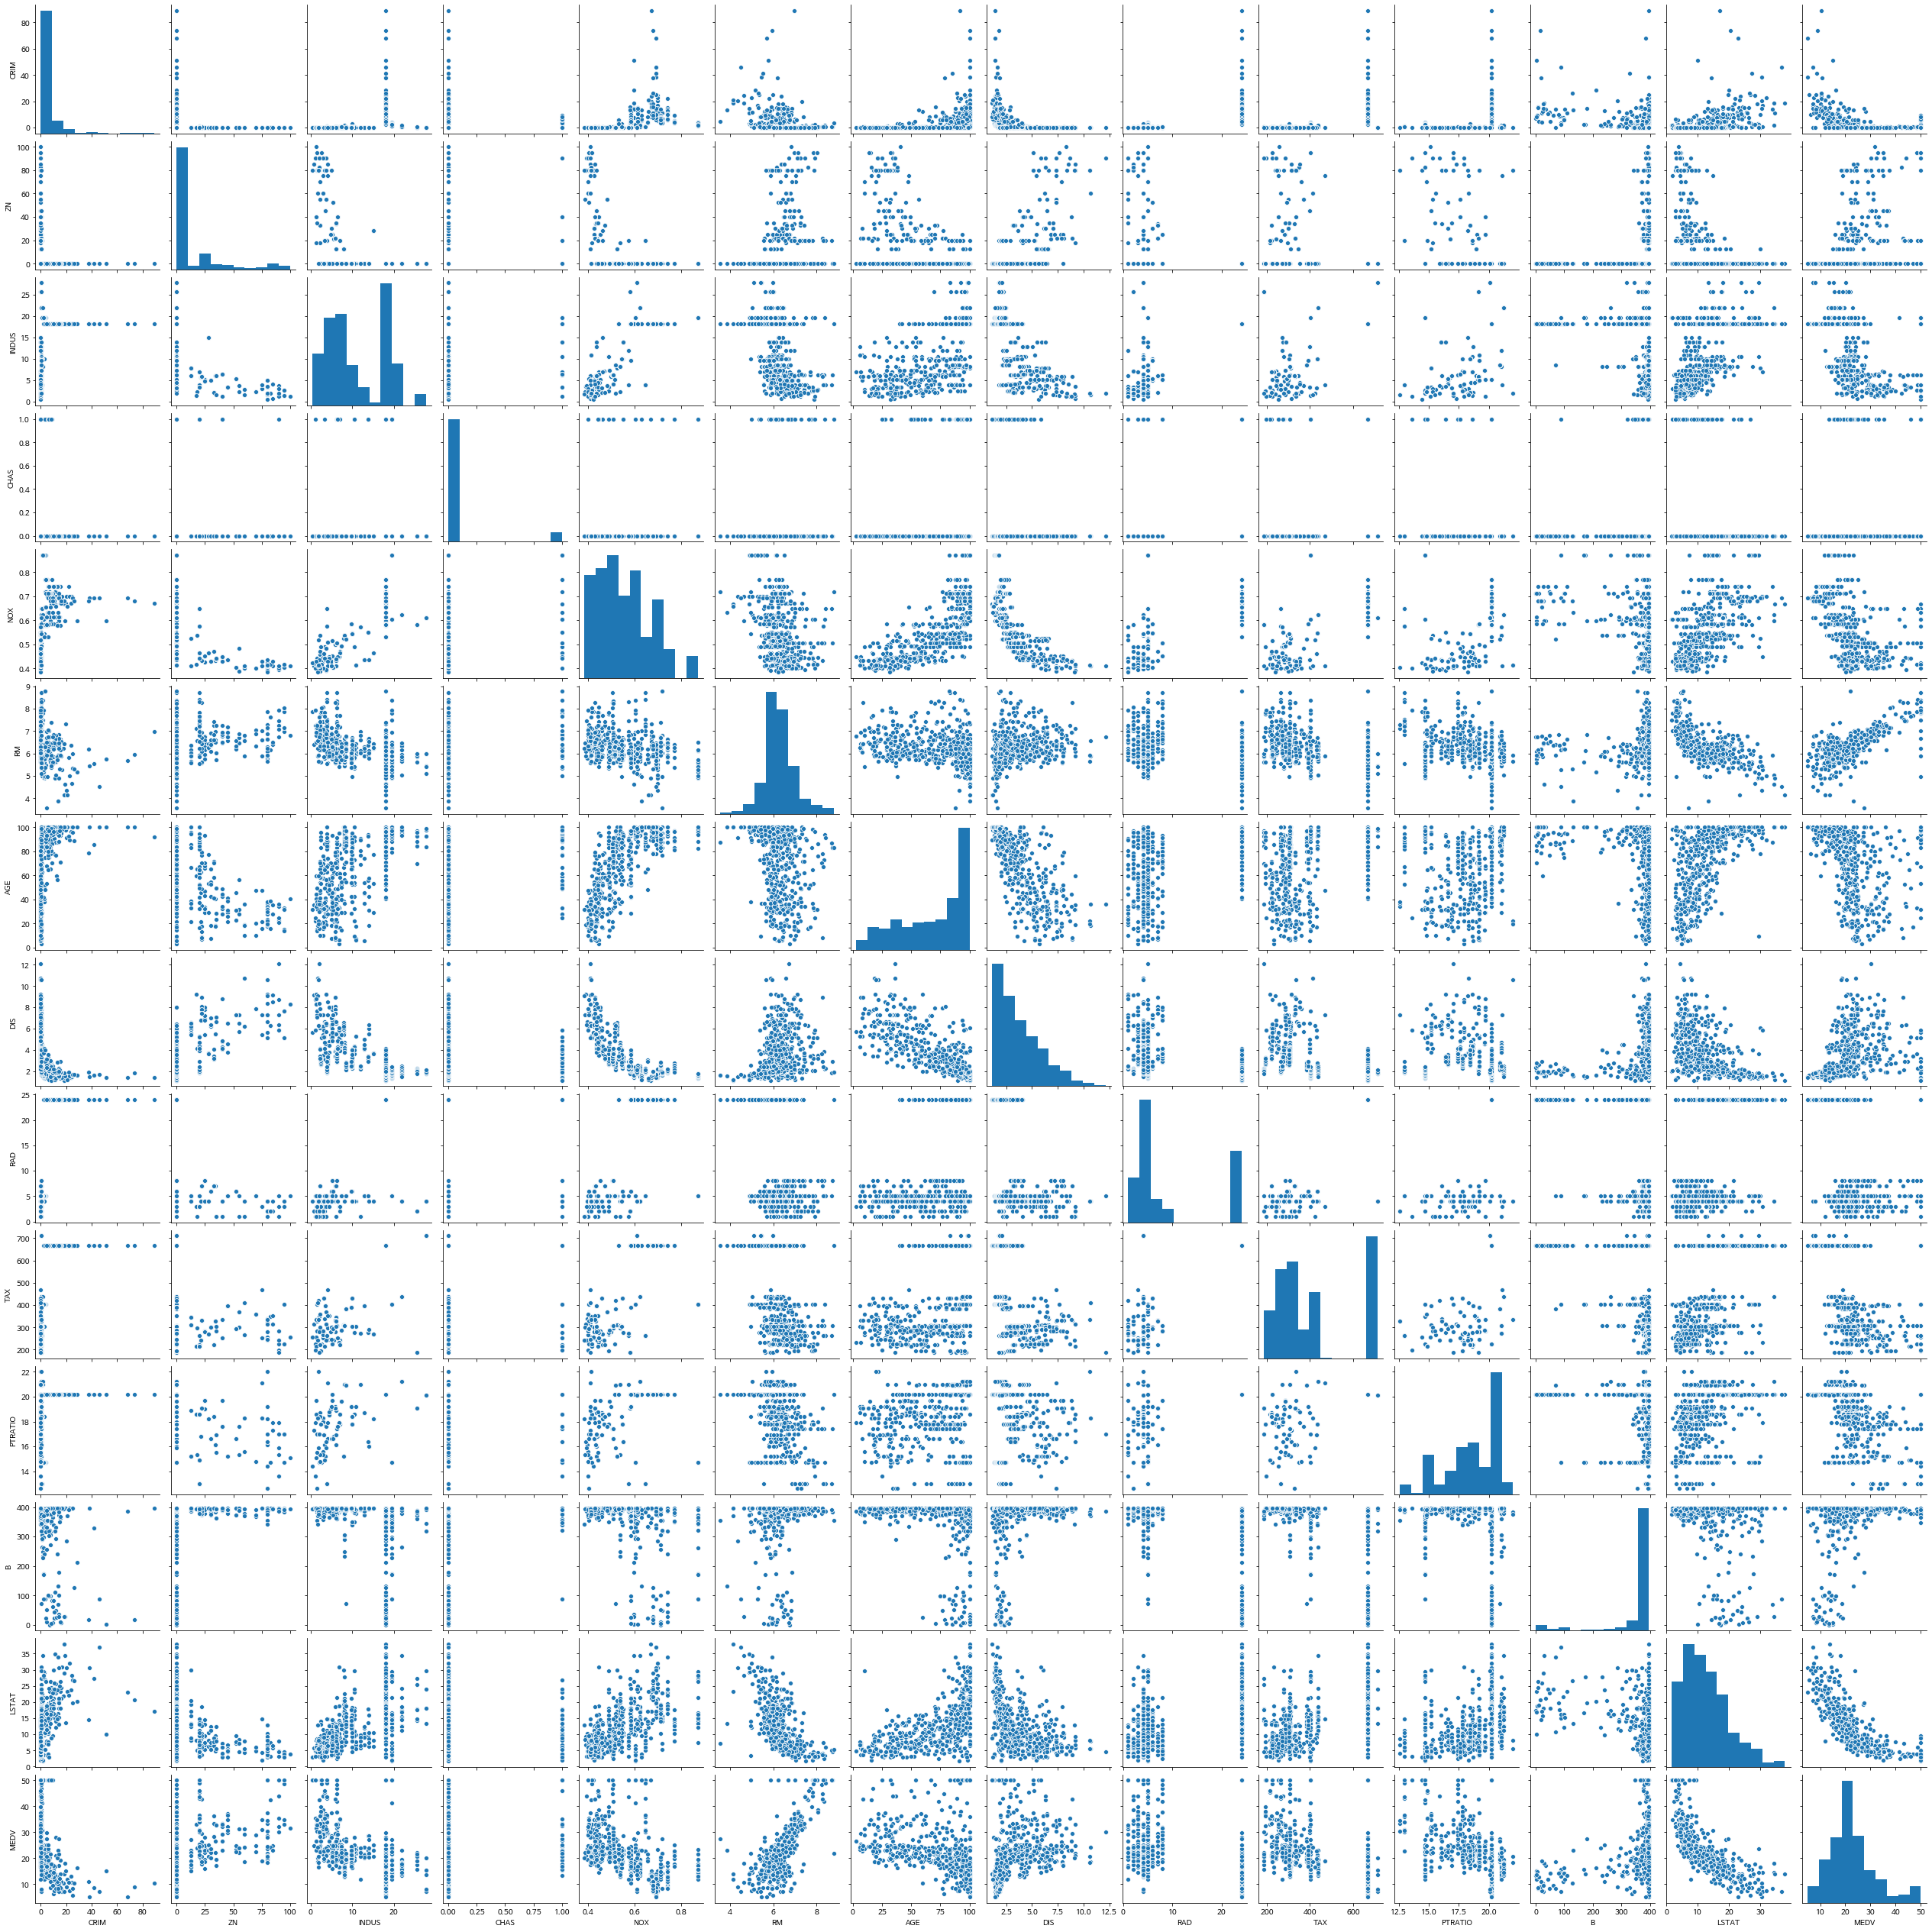

In [ ]:
# 다중 회귀분석
sns.pairplot(df_boston)

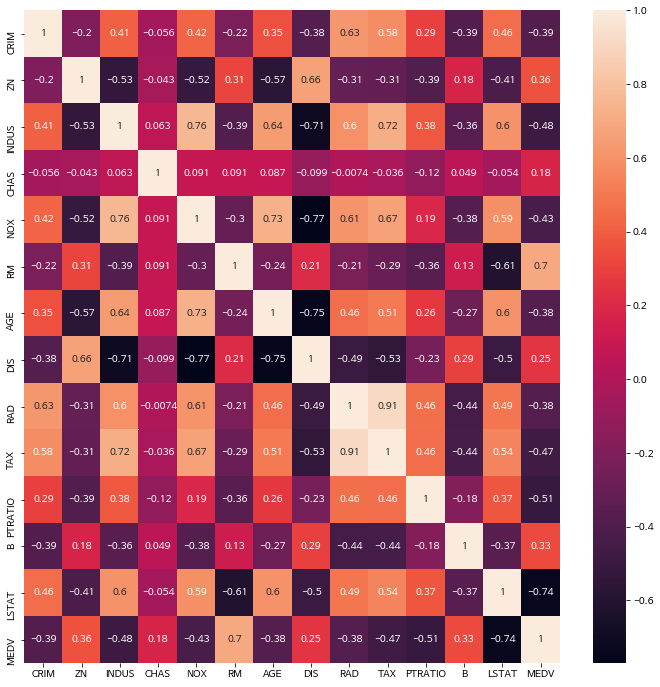

In [ ]:
bscorr = df_boston.corr()

fig, axs = plt.subplots(figsize=(12,12))
sns.heatmap(bscorr , annot=True, ax=axs)


In [ ]:
# 다중 회귀모델
model = ols('MEDV~CRIM+ZN+INDUS+CHAS+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.27e-131
Time:                        06:58:04   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5000      4.364      5.385      0.0

In [ ]:
print(model.exog_names) # 독립변수 이름 확인

for i in range(1, len(model.exog_names)):
   print(variance_inflation_factor(model.exog, i) )


['Intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
1.7858220728854357
2.2958139419470625
3.713460377054957
1.0727865335003435
1.9168516591053824
2.882840494891449
3.6415012430792593
7.333245842591441
8.958424922809177
1.603626206176127
1.3409624853360433
2.9275806484058333


In [ ]:
# 유의하지 않은 변수는 제거하고 다시 다중회귀분석
model = ols('MEDV~CRIM+ZN+CHAS+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     132.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.75e-133
Time:                        07:04:13   Log-Likelihood:                -1510.9
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     495   BIC:                             3090.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6054      4.325      5.227      0.0

In [ ]:
# 회귀모델 생성 기여도가 작은 변수는 제거하고 다시 다중회귀분석
model = ols('MEDV~ZN+CHAS+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.81e-132
Time:                        07:09:20   Log-Likelihood:                -1515.2
No. Observations:                 506   AIC:                             3050.
Df Residuals:                     496   BIC:                             3093.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2187      4.355      5.102      0.0

In [ ]:
model = ols('MEDV~1', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 27 Jul 2020   Prob (F-statistic):                nan
Time:                        07:13:58   Log-Likelihood:                -1840.2
No. Observations:                 506   AIC:                             3682.
Df Residuals:                     505   BIC:                             3687.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.409     55.111      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


In [ ]:
model = ols('MEDV~CRIM', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.17e-19
Time:                        07:14:36   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

In [ ]:
model = ols('MEDV~CRIM+ZN', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     76.82
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           7.68e-30
Time:                        07:15:48   Log-Likelihood:                -1772.8
No. Observations:                 506   AIC:                             3552.
Df Residuals:                     503   BIC:                             3564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4856      0.442     50.904      0.0

In [ ]:
# 3단계
model = ols('MEDV~CRIM+ZN+INDUS', data=df_boston)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     69.59
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.21e-37
Time:                        07:17:51   Log-Likelihood:                -1752.3
No. Observations:                 506   AIC:                             3513.
Df Residuals:                     502   BIC:                             3529.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3946      0.865     31.676      0.0

In [ ]:

# 다중회귀모형 분석방법
* 수정된 결정계수
 + 독립변수의 수가 증가할수록 예측력이 좋아져서
 + 결정계수의 수치가 증가하는 경향이 있음
 + 이러한 효과를 상쇄시킨 수정된 결정계수를 사용

* 모든 회귀계수들의 유의성을 판단 : F분포
 + 다중회귀계수가 모두 0인지 검정함
 + 귀무가설 : 각 계수 a,b,c 가 0이다
 + 대립가설 : 각 계수 a,b,c 가 0이 아니다
 + 유의수준 0.05로 정함, 양측검정

* 개별회귀계수에 대한 평가 : t분포
 + 귀무가설 : 계수 x 가 0이다
 + 대립가설 : 계수 x 가 0이 아니다
 + 유의수준 0.05로 정함, 양측검정
	

oldcars = pd.read_csv   ('https://~~/bigdataset//oldcars.txt', sep='\t')
sns.regplot(oldcars['Age'], oldcars['Price'])

result = ols('Price~Age', data=oldcars).fit()
print(result.summary())

# 회귀모델 분석
# 1.결정계수 : 0.296
# 2.F통계량 : 4.195 (0.0677) !!
# 3.회귀계수 : 절편-11.178, 기울기-(-0.479)
# 4.회귀계수 유의수준 : (>0.001/0.068)
# 5.회귀식 : y = -0.479*x + 11.178



파이썬통계17-다중회귀분석

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

* 다중회귀방정식
$ \hat{y} = a + bx_1 + cx_2 + dx_3 + ... $


# 한글설정 1 - 폰트설치
!sudo apt-get install -y fonts-nanum  # 폰트설치
!sudo fc-cache -fv  # 폰트캐시 재구성
!rm ~/.cache/matplotlib -rf  # matplotlib 캐시 제거
# 설치가 끝나면 코렙의 런타임을 다시 시작함


# 한글설정 2 - 폰트 지정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False


# ex) 부동산회사에서 소유하고 있는 주택에 대해
# 고객들의 많은 문의사항 중 하나는 난방비가
# 얼마나 드냐임. 난방비 가이드라인 작성을 위해
# 임의로 선별한 20채의 주택에 대해
# 다중회귀분석을 실시하시오 (houses.txt)
houses = pd.read_csv('https://~houses.txt',                   sep='\t', encoding='euc-kr')
sns.pairplot(houses)

# 다중회귀분석
# 종속변수~독립변수1+독립변수2+독립변수3+...
# 종속변수~.  (. : 종속변수를 제외한 나머지 모든 독립변수)
result = ols('난방비~평균외부기온+단열재+난방사용연수', data=houses).fit()
print(result.summary())

# 다중회귀모델 분석
# 1.수정된 결정계수 : 0.767
# 2.F통계량 : 21.90 (6.56e-06) 
# 3.회귀계수 : 절편-427.1938, 
     기울기1-(-4.5827), 기울기2-(-14.8309)
     기울기3-(6.1010)
# 4.회귀계수 유의수준 : 
    (>0.00001/>0.00001/0.007/0.148)
# 5.회귀식 : 
    y = -4.58*x1 + -14.83*x2 + 6.10*x3 + 427.19

# 다중회귀모델 해석
1) 외부기온 1도 증가 => 난방비는 4.58 감소
2) 단열재 두께가 1cm 증가 => 난방비는 14.83 감소
3) 난방기연수가 1년증가 => 난방비는 6.10 증가
4) 주택 자체 기본 난방비 => 난방비는 427.19


ex) 놀이동산 만족도 데이터를 이용해서
놀이기구rides,게임만족도games,청결만족도clean와 
전체만족도overall에 대한 관계를 분석해보고
회귀방정식을 작성하시오 (parks.csv)

parks = pd.read_csv('https://raw.githubusercontent.com/siestageek/bigdataset/master/parks.csv')

sns.pairplot(parks.loc[:, ['rides','games','clean','overall']])

# 상관분석을 히트맵으로 표시
df_corr = parks.loc[:, ['rides','games','clean','overall']].corr()

fig, axs = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, annot=True, ax=axs)

# 다중회귀분석
result = ols('overall~rides+games+clean', data=parks).fit()
print(result.summary())

# 다중회귀모델 분석
# 1.수정된 결정계수 : 0.436
# 2.F통계량 : 129.5 (5.99e-62) 
# 3.회귀계수 : 절편-(-131.68), 
     기울기1-(0.5780), 기울기2-(0.2603)
     기울기3-(1.2838)
# 4.회귀계수 유의수준 : 
    (>0.00001/>0.00001/>0.00001/>0.00001)
# 5.회귀식 : 
    y = 0.58*x1 + 0.26*x2 + 1.28*x3 - 131.68


# 회귀모형의 적합성 검정
* 주택회사가 보유한 주택에 대한 난방비 가이드라인 작성을 위해
다중회귀분석을 실시했었음
* 한편, 이러한 회귀모형이 과연 적합한 것일까?

* 회귀모형 작성시 적절한 필요조건을 만족하는지 알아봄
=> 선형성/정규성/분산성/독립성

github commit msg
다중회귀분석용 그래프

# 다중공선성
* 독립변수는 종속변수하고만 상관관계가 존재해야 함
* 공선성 : 하나의 독립변수가 다른 하나의 독립변수에 의해 
         잘 예측되는 정도 또는 서로 상관이 높은 경우를 의미
* 다중공선성 : 하나의 독립변수가 다른 여러개의 독립변수에 의해 
            잘 예측되는 정도를 의미
* 다중공선성이 있으면 계수 추정이 잘 안되거나 불안정해져서 
  데이터가 약간만 바뀌어도 추정치가 크게 달라질수 있음 

$$ VIF_i = {1 \over {1-R^2_i}} $$

* 두 독립변수간의 상관계수가 -0.7~0.7사이면 사용해도 됨
* 분산팽창계수(VIF)를 구하여 판단하기도 함
* 엄밀한 기준은 없으나 보통 10을 넘어서면 다중공선성이 있다고 판단

# ex) 다중공선성 문제 풀기
# 시멘트가 굳어지며 발생하는 열의 양을 
# 결정짓는 4가지 성분의 회귀분석
  
x1 = [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]
x2 = [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]
x3 = [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]
x4 = [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]

y = [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 
       72.5, 93.1, 115.9, 83.8, 113.3, 109.4]

cement = pd.DataFrame({'x1':x1,'x2':x2,
		      'x3':x3,'x4':x4,'y':y})

sns.pairplot(cement)


# 상관계수 시작화
df_corr = cement.corr()
sns.heatmap(df_corr, annot=True)

# 다중회귀분석
result = ols('y~x1+x2+x3+x4', data=cement).fit()
print(result.summary())

# 분석결과
# 결정계수는 높지만 (심지어 조정된 결정계수조차도!)
# 각 계수별 유의성은 거의 없음! (유의확률 0.05보 큼) 
# => 다중공선성 때문에 발생 => 따라서, 팽창계수VIF를 확인해 봄

# 다중공선성 알아보기
# statsmodels 패키지에서 variance_inflation_factor 함수 사용
from statsmodels.stats.outliers_influence 
 import variance_inflation_factor

model = ols('y~x1+x2+x3+x4', data=cement)
print(model.exog_names) # 독립변수 이름 확인

print(variance_inflation_factor(model.exog, 1))
# 1번째 독립변수의 VIF 확인

print(variance_inflation_factor(model.exog, 2))
# 2번째 독립변수의 VIF 확인

print(variance_inflation_factor(model.exog, 3))
# 3번째 독립변수의 VIF 확인

print(variance_inflation_factor(model.exog, 4))
# 4번째 독립변수의 VIF 확인

# x1,x3에 비해 x2,x4의 팽창계수가 큼
# x2,x4를 제외하고 다시 회귀모형 생성

# 1. x1,x3을 이용한 다중회귀분석
model = ols('y~x1+x3', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

# 수정된 결정계수 : 0.458
# 회귀계수 x3이 유의성 검정 실패!
# 팽창계수는 작지만, 모델의 설명력이 떨어짐


# 2. x1,x2을 이용한 다중회귀분석
model = ols('y~x1+x2', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

# 수정된 결정계수 : 0.974
# 회귀계수들은 유의성 검정 성공!
# 팽창계수는 정상범위내 임

# 3. x3,x4을 이용한 다중회귀분석
model = ols('y~x3+x4', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

# 수정된 결정계수 :  0.922
# 회귀계수들은 유의성 검정 성공!
# 팽창계수는 정상범위내 임

# 4. x2,x3,x4을 이용한 다중회귀분석
model = ols('y~x2+x3+x4', data=cement)
print(model.fit().summary())
print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

# 수정된 결정계수 :  0.964
# 회귀계수들은 유의성 검정 성공!
# x2, x4의 팽창계수가 큼


# ex) 부동산회사에서 소유하고 있는 주택에 대해
# 예상 난방비를 예측하려함. 모든 독립 변수들을 
후진 소거법을 이용해서 적절한 회귀방정식을 작성하세요


houses = pd.read_csv('houses.txt', 
                     sep='\t', encoding='euc-kr')

model = ols('난방비~평균외부기온+단열재+난방사용연수', data=houses)
result = model.fit()
print(result.summary())

# 회귀계수들 중에서 p값이 큰것들은 제외함
# => 난방사용연수는 제외함

# 난방사용연수 제외하고 다시 다항회귀분석
model = ols('난방비~평균외부기온+단열재', data=houses)
result = model.fit()
print(result.summary())

# 수정된 결정계수값이 줄었지만 모든 회귀계수의 유의확률이 정상
# 결론 : 평균외부기온, 단열재들만 이용해서 회귀식을 재작성함
# y = 490.29 + -5.15*x1 + -14.72*x2


# 변수소거시 참고해야하는 지표 : AIC, BIC
# 모델에 k개의 변수를 추가하면 2k만큼 불이익이 추가함
# 따라서, 변수 소거시 AIC, BIC가 낮아지는 모델을 찾으면 됨

# AIC : akaike information criterion
# BIC : Bayes information criterion
# RSS : 잔차크기 

$$ AIC = 2P + nlog({RSS \over n}) $$
$$ BIC = plog(n) + nlog({RSS \over n}) $$


# Boston 집값 데이터를 이용해서
# 다중회귀분석을 실시하고
# 적절한 변수들로 구성된 회귀식을 작성하세요
# 1979 보스턴 지역 주택가격
# 560개 타운의 주택가격의 중앙값(단위 1000 달러)

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

df_boston = pd.DataFrame(boston.data,         columns=boston.feature_names)
# boston.data : 독립변수들로만 구성된 데이터 묶음
# boston.feature_names : 독립변수의 실제 컬럼명

df_boston['MEDV'] = boston.target
# boston.target : 종속변수로 구성된 데이터 묶음

df_boston.head()


# 다중 회귀분석
sns.pairplot(df_boston)

# 상관 분석
bscorr = df_boston.corr()
fig, axs = plt.subplots(figsize=(12,12))
sns.heatmap(bscorr , annot=True, ax=axs)

# 다중 회귀모델
model = ols('MEDV~CRIM+ZN+INDUS+CHAS+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_boston)
print(model.fit().summary())

# 1.수정된 결정계수 : 0.723
# 2.F통계량 : 110.6 (<0.0001) 
# 3.회귀계수 : INDUS, AGE 만 유의성 검정에 실패 
# 4.회귀계수 유의수준 : 
# 5.회귀식 : 

# 다중공선성 확인
print(model.exog_names)
    
for i in range(1, len(model.exog_names)):
   print(variance_inflation_factor(model.exog, i))

# 유의하지 않은 변수는 제거하고 다시 다중회귀분석
model = ols('MEDV~CRIM+ZN+CHAS+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_boston)
print(model.fit().summary())

# 1.수정된 결정계수 :  0.722
# 2.F통계량 : 132.4 (<0.0001) 
# 3.회귀계수 : 모든 회귀계수 유의성 검정에 만족
# 4.회귀계수 유의수준 : CRIM 빼고는 모두 < 0.0001
# 5.회귀식 : 
# 6.AIC : 3045 -> 3044 줄어듬
# 회귀식을 좀더 정리하고 싶다면 CRIM을 제외시켜도 됨


# 회귀모델 생성 기여도가 작은 변수는 제거하고 다시 다중회귀분석
model = ols('MEDV~ZN+CHAS+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_boston)
print(model.fit().summary())

# 1.수정된 결정계수 :  0.718
# 2.F통계량 : 144.1 (<0.0001) 
# 3.회귀계수 : 모든 회귀계수 유의성 검정에 만족
# 4.회귀계수 유의수준 : CHAS 빼고는 모두 < 0.0001
# 5.회귀식 : 
# 6.AIC : 3044 -> 3050 줄어듬


# 전진소거법 : 아무것도 식에 독립변수를 추가하면서 적절한 식을 
만드는 방법

# 0단계
model = ols('MEDV~1', data=df_boston)
print(model.fit().summary())
# AIC : 3682

# 1단계
model = ols('MEDV~CRIM', data=df_boston)
print(model.fit().summary())

# 결정계수 : 0.1498
# CRIM 변수의 유의확률 문제없음
# AIC : 3682 -> 3602

# 2단계
model = ols('MEDV~CRIM+ZN', data=df_boston)
print(model.fit().summary())

# 결정계수 : 0.234
# CRIM, ZN 변수의 유의확률 문제없음
# AIC : 3602 -> 3552

# 3단계
model = ols('MEDV~CRIM+ZN+INDUS', data=df_boston)
print(model.fit().summary())

# 결정계수 : 0.294
# CRIM, ZN, INDUS 변수의 유의확률 문제없음
# AIC : 3552 -> 3513

